---
title: "Postgresql JOIN USING vs JOIN ON 🥞"
execute: 
  enabled: false
  freeze: true
date: "8/26/2024"
date-modified: "9/2/2024"
categories: [sql, postgresql]
---


I recently learnt that we can directly use `USING()` clause as shorthand when joining tables in Postgresql. Here is the an excerpt from the documentation.



[Click on the image to check the full documentation]
<a href="https://www.postgresql.org/docs/9.4/queries-table-expressions.html#:~:text=take%20advantage%20of%20the%20specific%20situation%20where%20both%20sides%20of%20the%20join%20use%20the%20same%20name%20for%20the%20joining%20column(s)">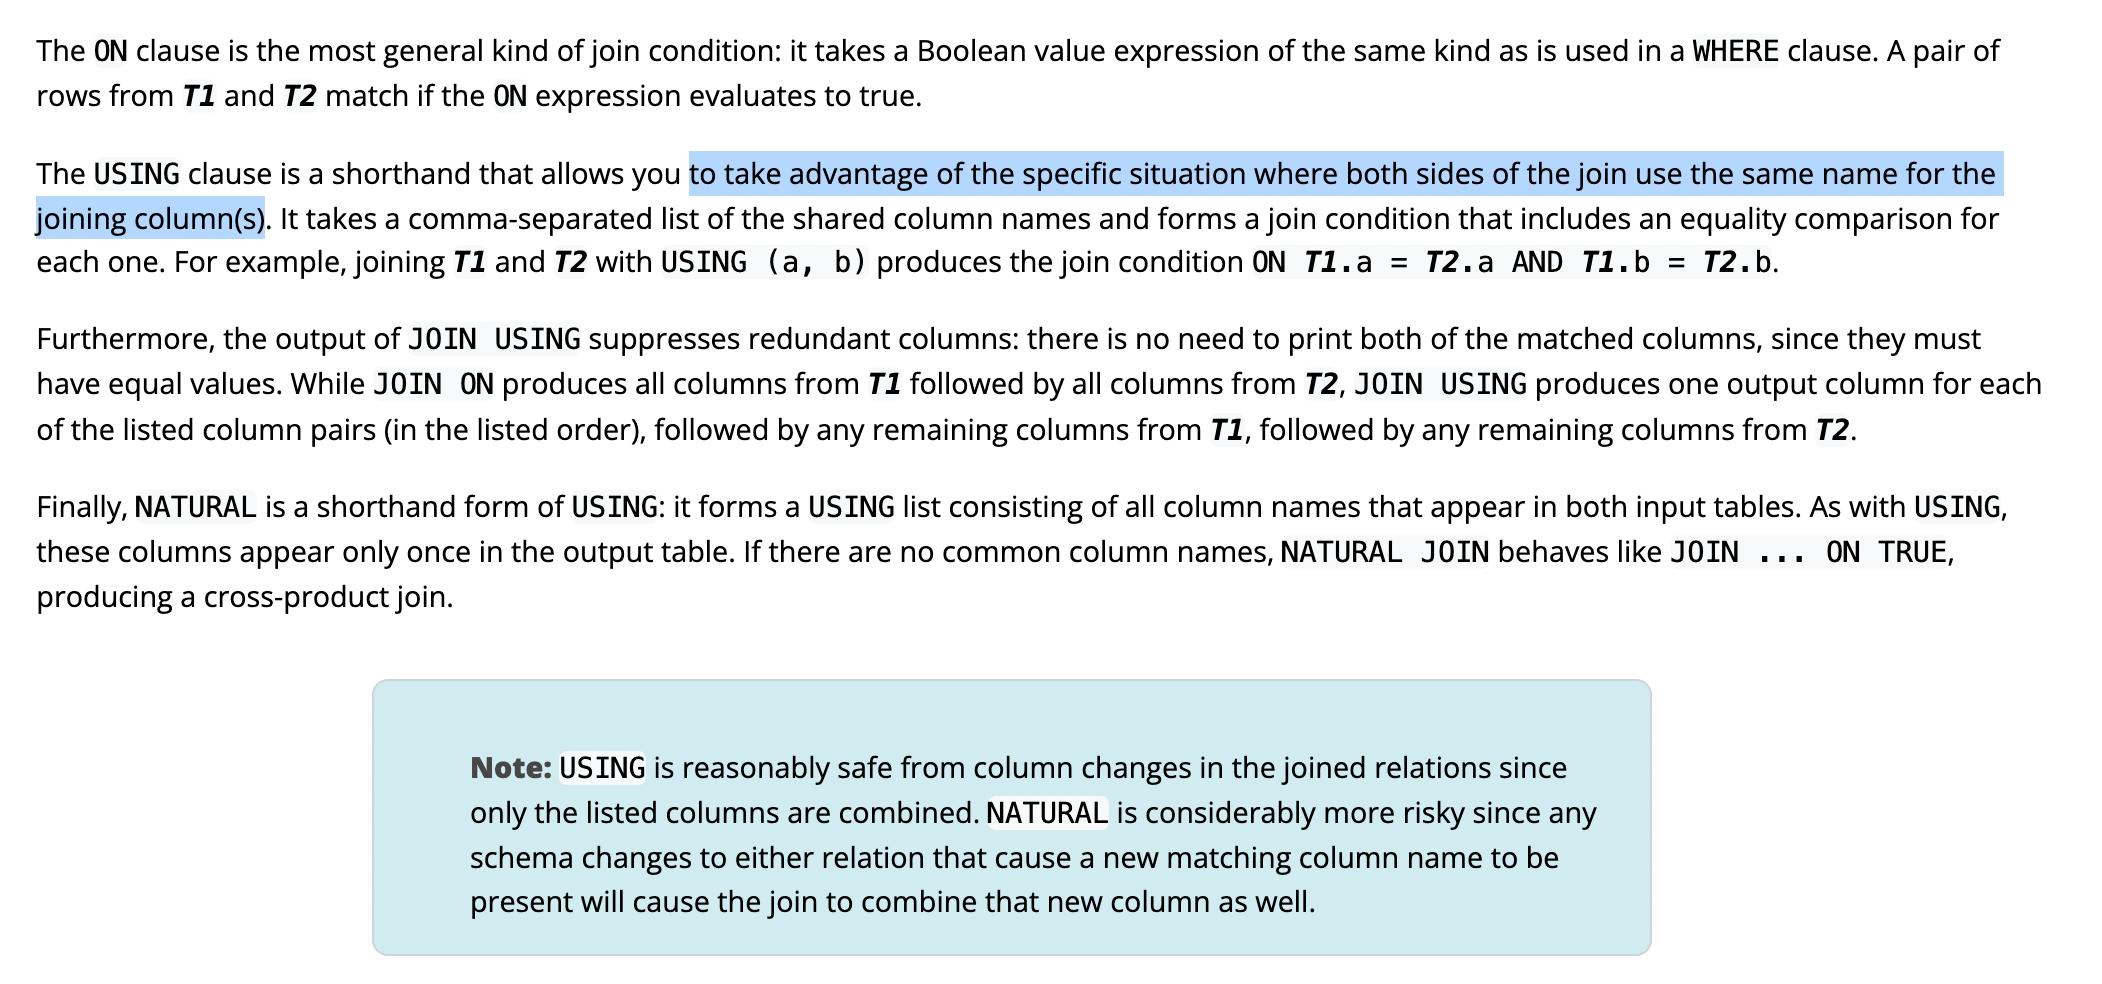</a>

In [ ]:
--  Pets Table
CREATE TABLE pets(id INT, type VARCHAR);
INSERT INTO pets VALUES(1, 'dog');
INSERT INTO pets VALUES(2, 'bird');
INSERT INTO pets VALUES(3, 'cat');
INSERT INTO pets VALUES(4, 'monkey');

-- -- -- -- -- -- -- -- -- -- -- -- -- 

--  Owner Table
CREATE TABLE owner(id INT, name VARCHAR, pet_id INT);
INSERT INTO owner VALUES(1, 'Sarah', 1);
INSERT INTO owner VALUES(2, 'Bob', 2);
INSERT INTO owner VALUES(3, 'Emily', 3);
INSERT INTO owner VALUES(4, 'John', NULL);


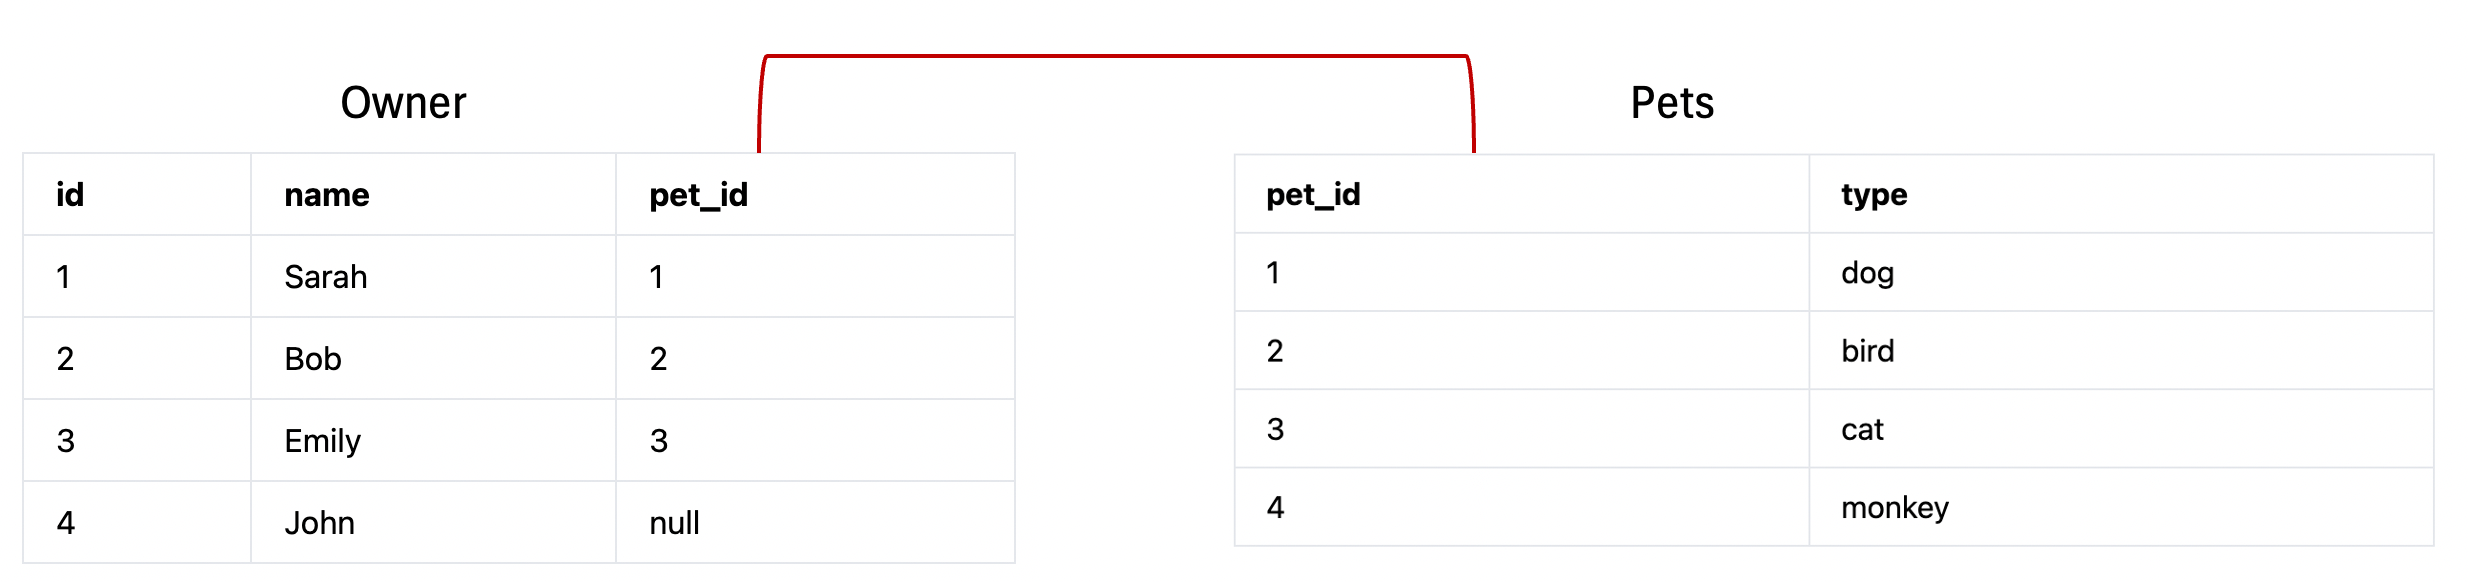

Let's use the tables above as an example. Say we want to merge `pet_id` from both of the tables to find the pet type for each person listed in `Owner` table. 

An option is to use `USING(pet_id)` clause. This is similar to `JOIN ... ON owner.pet_id = pets.pet_id` but will combine all resulting unique ids from both table.

In [ ]:
--  JOIN with USING

SELECT pet_id, type, name
FROM owner
FULL JOIN pets USING(pet_id);


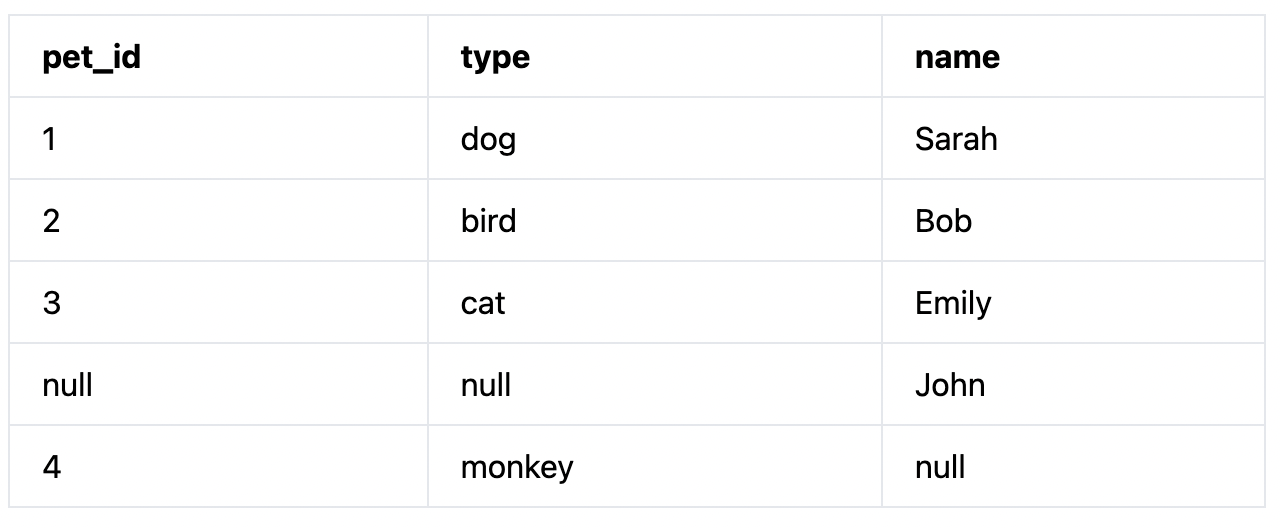

We can get the same result if above it we use normal `JOIN ON...` with `CASE` clause.. but this is definitely more wordy...

In [ ]:
-- Normal JOIN ON... with CASE

SELECT CASE
		WHEN o.pet_id IS NULL THEN p.pet_id
        ELSE o.pet_id
        END AS pet_id,
        p.type, o.name
        FROM OWNER AS o
        FULL JOIN pets AS p
ON o.pet_id = p.pet_id

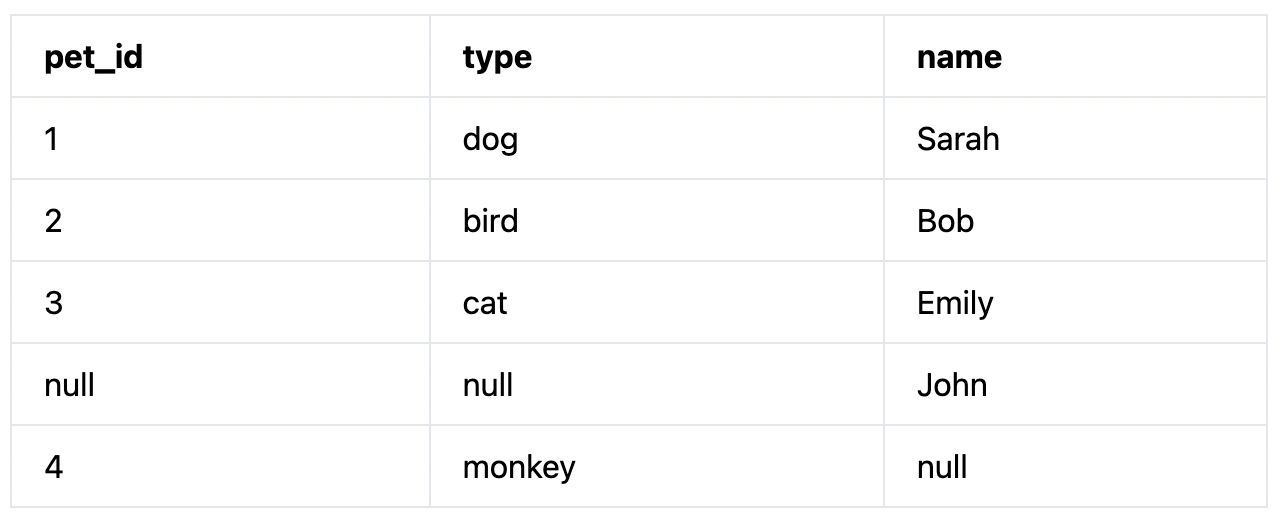